In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json
import re

Pull in the processed inventory

In [2]:
ra = "aoos"

#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).


ra_clean = re.sub(r'[0-9]', '', ra) # remove number from RA 

df = pd.read_excel('2024/data/processed/%s.xlsx' % ra_clean.upper(), dtype=str)
df.head()

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,Unnamed: 18
0,AOOS,CSESM,NOT REAL TIME,Chukchi Sea Ecosystem Mooring (CSESM) Array,Hannah Shoal subsurface ecosystem mooring with...,71.5997,-161.5054,moored_buoy,2014-09-20 00:00:00,Y - but never real time,"AOOS, NPRB, UAF, others",Yp,UAF_CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature (35m, 48m, near-bottom),...",two to three moorings at the CEO which are rot...,NaN
1,AOOS,CEO1,Not real time,CEO1 (part of the CSEM),NaN,71.5997,-161.5054,moored_buoy,2014-09-21 00:00:00,Y - but never real time,same as above,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",Data visualizaed on the AOOS Portal includes 2...,NaN
2,AOOS,CEO2,Not real time,CEO2 (part of the CSEM),NaN,71.5998,-161.5261,moored_buoy,2015-08-20 00:00:00,Y- but never real time,sames as above,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",This is the list of all sensors reporting to t...,NaN
3,AOOS,urn:gulf-of-alaska-ecosystem-obse,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO1,"Surface real time mooring: CDOM, 150kHz ADCP, ...",59.0142,-148.6902,Fixed moored_buoy,2019-07-11 00:00:00,"Y - but not real time at moment, so data not u...","M.J. Murdock Charitable Trust, AOOS, NPRB, Gul...",Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: 150kHz ADCP (205m), SBE 37 ...",The buoy was not serving real time data feeds ...,NaN
4,AOOS,urn:gulf-of-alaska-ecosystem-obse-1,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO3,"Surface real time mooring: GPS, wind speed, wi...",59.0165,-148.6966,Fixed moored_buoy,2019-07-11 00:00:00,Y - but not real time at moment,"M.J. Murdock Charitable Trust, AOOS, NPRB, Gul...",Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: GPS, wind_speed, wind_from_...","Note: The 5 m SBE 37 CTD (Conductivity, temper...",NaN


## Check column headers

The official column headers are found in the README at https://github.com/ioos/ioos-asset-inventory/tree/main. This checks the column headers from the RA inventory against our official column headers to see if anything is missing. The result will print out what columns are missing from the RA inventory and what columns the RA added to their inventory.

In [3]:
url = 'https://github.com/ioos/ioos-asset-inventory/tree/main'

import pandas as pd

df_fields = pd.read_html(url)#

control_fields = df_fields[2]['Field'].tolist()


def diff(a, b):
  if len(set(a) - set(b)) > 0:
    print(f"Columns missing: {set(a) - set(b)}")
  if len(set(b) - set(a)) > 0:
    print(f"Columns added: {set(b) - set(a)}")
  if set(a) == set(b):
    print(f"They are the same")

diff(control_fields, df.columns.tolist())

Columns added: {'Unnamed: 18'}


Make a plot of all points.

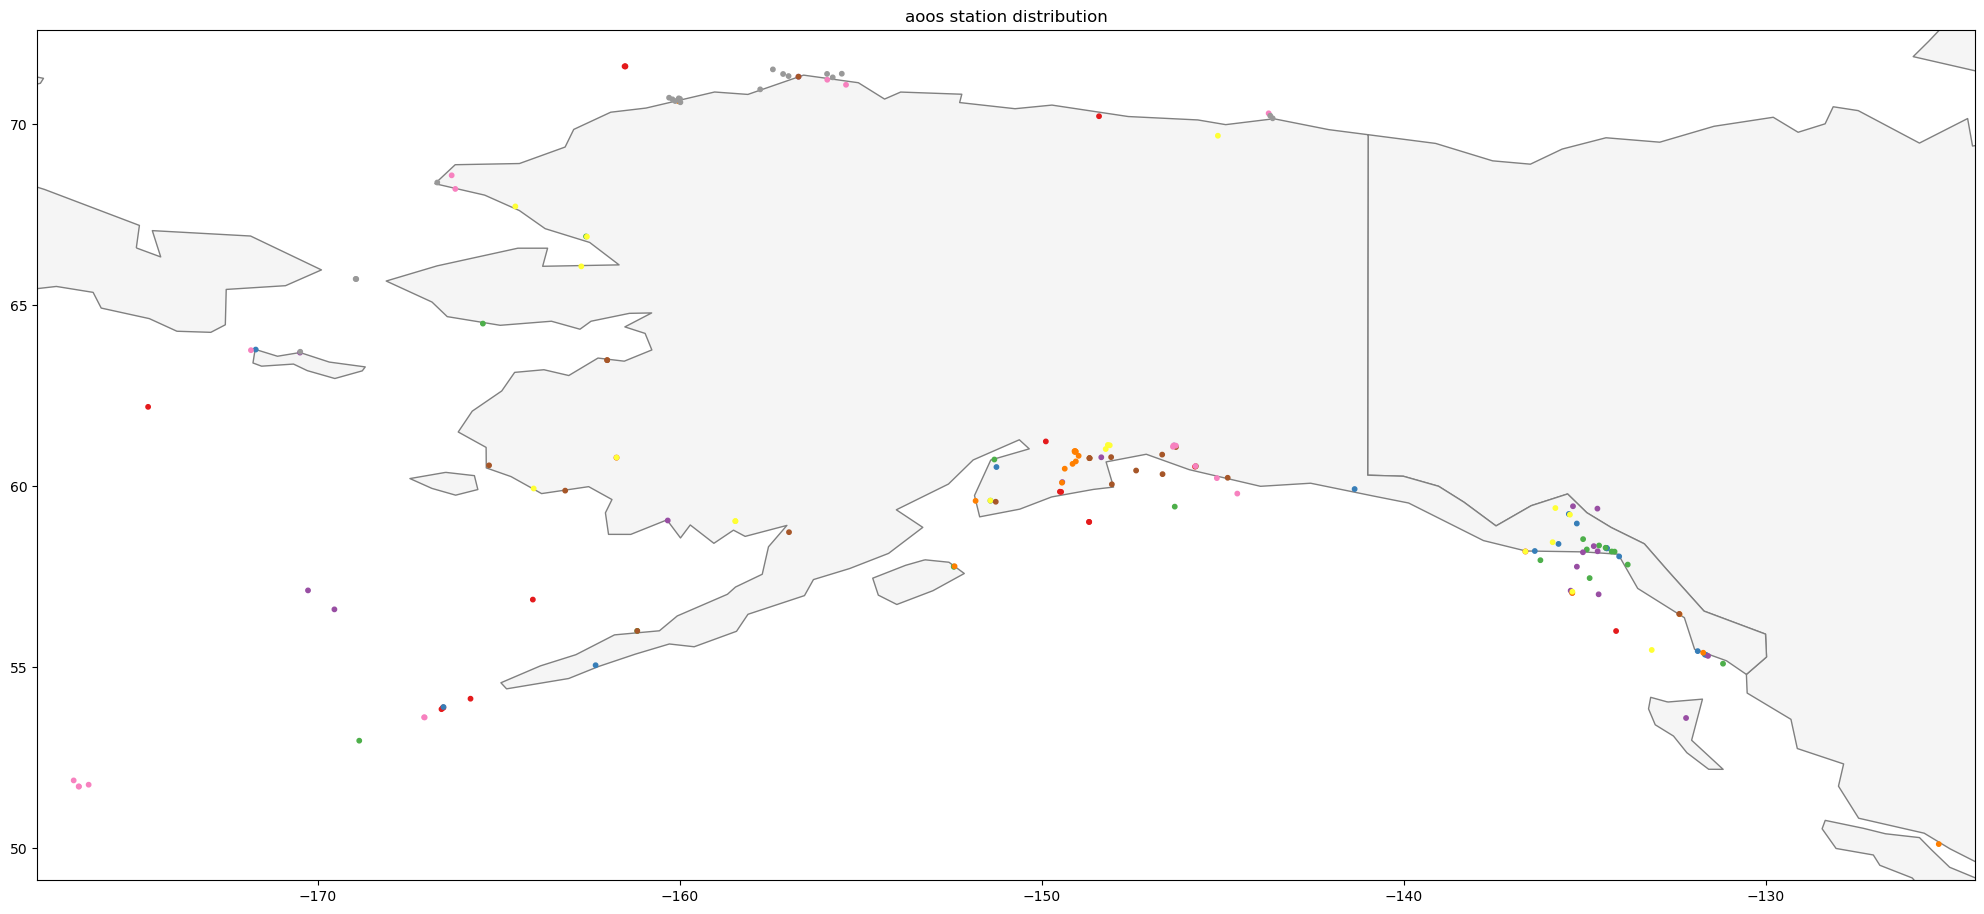

In [4]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         #column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [5]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore()#'erddap_avail',cmap = 'Set1')


Configure the ERDDAP to search

In [6]:
with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

http://erddap.aoos.org/erddap


Search the ERDDAP server for a single station of interest - more of a test

In [7]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [8]:
# df_wf = df[df['Station ID'] == 'Jug_Bay']

# # for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
# search_for = df_wf['Station ID'].to_string()

# search_url = e.get_search_url(search_for=search_for, response="csv")

# try:
#     resp = pd.read_csv(search_url)
#     print(resp['Station ID'])
# except:
#     pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [9]:
not_found = []
found = dict()

exclude = ' -gliders'


if ra == 'glos':
    search_order = ['Dataset (ERDDAP) ID','Station ID', 'Station Long Name']
elif ra == 'sccoos':
    search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']
else:
    search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

for search1 in df[search_order[0]].astype(str):

    if search1 == "nan":
        print("punting with %s = nan\n" % search_order[0])
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        for dset_id in resp['Dataset ID'].values.tolist():
            if search1.lower() in dset_id.lower():
                found[search1] = {'Dataset ID': [dset_id]}
                print("Keeping \"%s\": %s" % (search1,dset_id))
                #found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station ID" = "CSESM"
no dataset matching "CSESM"
searching "Station Long Name" = "Chukchi Sea Ecosystem Mooring (CSESM) Array"
searching "WMO ID or NWS/CMAN ID" = "NOT REAL TIME "
Found "NOT REAL TIME ": ['ca_hydro_07HC001', 'ca_hydro_05DE006', 'ca_hydro_08HDX24', 'ca_hydro_08GAX43', 'ca_hydro_07FAX06', 'ca_hydro_07FBX08', 'ca_hydro_08NBX17', 'ca_hydro_08NB019', 'ca_hydro_08MB005', 'ca_hydro_08EG016', 'ca_hydro_08MC039', 'ca_hydro_08HD003', 'ca_hydro_07SB002', 'big-lake-venetie-ak', 'third-lake-noatak-ak', 'yugayu-lake-bethel-ak', 'pleasant-lake-nenana-ak', 'tsa-bene-kenny-lake-ak', 'dzan-lake-chalkyitsik-ak', 'richard-s-pond-nuiqsut-ak', 'shageluk-lake-shageluk-ak', 'sam-charley-oxbow-fairbanks-ak', 'takomahto-lake-near-northway-ak', 'west-two-lake-between-galena-', 'little-paimute-lake-between-holy', 'org_inletkeeper_deshka_river', 'org_inletkeeper_anchor_river', 'org_inletkeeper_russian_river', 'ca_hydro_09AA001', 'ca_hydro_09AE002', 'ca_hydro_08EC001', 'ca_hydro_06AF002

Print the stations that we couldn't find.

In [10]:
len(not_found)

11

In [11]:
len(found)

154

Show me the record that has NaN for the first search element.

In [12]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,geometry


Now show me the stations, with identifiers, that we couldn't find.

In [13]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,geometry
3,AOOS,urn:gulf-of-alaska-ecosystem-obse,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO1,"Surface real time mooring: CDOM, 150kHz ADCP, ...",59.0142,-148.6902,Fixed moored_buoy,2019-07-11 00:00:00,"Y - but not real time at moment, so data not u...","M.J. Murdock Charitable Trust, AOOS, NPRB, Gul...",Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: 150kHz ADCP (205m), SBE 37 ...",The buoy was not serving real time data feeds ...,NaN,POINT (-148.69020 59.01420)
4,AOOS,urn:gulf-of-alaska-ecosystem-obse-1,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO3,"Surface real time mooring: GPS, wind speed, wi...",59.0165,-148.6966,Fixed moored_buoy,2019-07-11 00:00:00,Y - but not real time at moment,"M.J. Murdock Charitable Trust, AOOS, NPRB, Gul...",Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: GPS, wind_speed, wind_from_...","Note: The 5 m SBE 37 CTD (Conductivity, temper...",NaN,POINT (-148.69660 59.01650)
6,AOOS,urn:ioos:station:gov.noaa.pmel:GAK_Seward,No longer reporting real time on AOOS Portal,GAKOA-Gulf of Alaska Ocean Acidification Mooring,"Resurrection Bay, Seward, Real-time OA parameters",59.85,-149.5,moored_buoy,2011-05-19 00:00:00,Y - Federal asset AOOS Supports,"AOOS, NOAA",Yp,NOAA_PMEL,gov_federal,"NOAA PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, these data are Not repo...",NaN,POINT (-149.50000 59.85000)
7,AOOS,urn:ioos:station:gov.noaa.pmel:m2,No longer reporting real time on AOOS Portal,M2 - Ocean Acidification Mooring and Ecosytem ...,"Bering Sea, Real-time OA parameters",56.87,-164.06,moored_buoy,1905-07-03 00:00:00,Y - Federal asset AOOS Supports,"NOAA, AOOS",Yp,NOAA_PMEL,gov_federal,"NOAA, PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, the data are Not report...",NaN,POINT (-164.06000 56.87000)
21,AOOS,urn:ioos:station:org.mxak:GAMBELL,BGBXA2,"Gambell, St. Lawrence Island",Weather and AIS eATON/Transceiver,63.776913,-171.71531,Fixed,2019-05-31 00:00:00,Y,"AOOS, MXAK",Yp,Marine Exchange of Alaska,nonprofit,MXAK (Marine Exchange of Alaska),AOOS,"dew_point_temperaure, air_temperature, air_pre...",NaN,NaN,POINT (-171.71531 63.77691)
71,AOOS,org-mxak-togiak,TGXA2,"Tokiak, AK",Weather (AIS Status unknown),59.0551,-160.3336,Fixed,2023-11-16 00:00:00,Y,MXAK,Yp,Marine Exchange of Alaska,nonprofit,MXAK (Marine Exchange of Alaska),AOOS,"dew_point_temperaure, air_temperature, air_pre...",new 2023,NaN,POINT (-160.33360 59.05510)
88,AOOS,urn:ioos:station:edu.oregonstate:burkolator,NaN,Alutiiq Pride Shellfish Hatchery Burke-o-Lator,"ALUTIIQ PRIDE SHELLFISH HATCHERY, SEWARD AK",60.0992,-149.4428,Fixed,1905-07-05 00:00:00,"N - Operated March 5 - April 29, 2024 Only, of...","IOOS OTT, BIA, AOOS, NOAA-OAP",Yp,Alutiiq Pride Shellfish Hatchery,Industry,"Alutiiq Pride SH, Hakai Institute",IPACOA,"dissolved_carbon_dioxide_co2, pco2, omega_arag...","Data In portal starts June 30, 2018. Stopped r...",NaN,POINT (-149.44280 60.09920)
89,AOOS,kodiak-burke-o-lator-kodiak-ak,NaN,"Kodiak Burke-o-Lator, Kodiak, AK","NOAA AFSC Operated Kodiak Burke-o-Lator, Kodia...",57.79,-152.41,Fixed,2022-10-01 00:00:00,"N - Stopped operating in real time January 7, ...","NOAA AFSC, AOOS",Yp,NOAA Alaska Fisheries Science Center (AFSC),Federal,NOAA AFSC,IPACOA and NOAA,"dissolved_carbon_dioxide_co2, pco2, omega_arag...",AOOS started supporting BOL operatrions in Kod...,NaN,POINT (-152.41000 57.79000)
90,AOOS,urn:ioos:station:org.hakai:Sitka,NaN,Sitka Burke-o-Lator,Sitka Tribe of Alaska Burke-O-Lator,57.0526,-135.3456,Fixed,2017-06-27 00:00:00,"N - Stopped operating

Print out all the dataset IDs for the datasets that matched our criteria.

In [14]:
found

{'CSESM': {'Dataset ID': ['ca_hydro_07HC001',
   'ca_hydro_05DE006',
   'ca_hydro_08HDX24',
   'ca_hydro_08GAX43',
   'ca_hydro_07FAX06',
   'ca_hydro_07FBX08',
   'ca_hydro_08NBX17',
   'ca_hydro_08NB019',
   'ca_hydro_08MB005',
   'ca_hydro_08EG016',
   'ca_hydro_08MC039',
   'ca_hydro_08HD003',
   'ca_hydro_07SB002',
   'big-lake-venetie-ak',
   'third-lake-noatak-ak',
   'yugayu-lake-bethel-ak',
   'pleasant-lake-nenana-ak',
   'tsa-bene-kenny-lake-ak',
   'dzan-lake-chalkyitsik-ak',
   'richard-s-pond-nuiqsut-ak',
   'shageluk-lake-shageluk-ak',
   'sam-charley-oxbow-fairbanks-ak',
   'takomahto-lake-near-northway-ak',
   'west-two-lake-between-galena-',
   'little-paimute-lake-between-holy',
   'org_inletkeeper_deshka_river',
   'org_inletkeeper_anchor_river',
   'org_inletkeeper_russian_river',
   'ca_hydro_09AA001',
   'ca_hydro_09AE002',
   'ca_hydro_08EC001',
   'ca_hydro_06AF002',
   'ca_hydro_07QC002',
   'ca_hydro_09AA004',
   'ca_hydro_09DC006',
   'ca_hydro_05DE002',
   

Check if each found dataset has coverage for specified CY

In [15]:
valid_datasets = []

cy = '2024'
n=0
for key in found:
    
    print(f'testing {key}')
    
    dataset_id = found[key]['Dataset ID'] #+" "+found[key]['Station ID']
    
    if (len(dataset_id)>1):
        
        for dataset in dataset_id:
            n+=1
            if (n<3):
                e.dataset_id = dataset
        
                e.constraints = {
                    "time>=": "{}-01-01".format(cy)
                }
            
                e.variables = ['time']
        
                try:
                    df_data = e.to_pandas(parse_dates=True)
                    valid_datasets.extend([key])
                    
                except:

                    print(f'No data for {cy} for {key}: dataset ID {e.dataset_id}')# % (key,e.dataset_id))

                    pass

                

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "{}-01-01".format(cy)
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:

            print(f'No data for {cy} for {key}: dataset ID {e.dataset_id}')# % (key,e.dataset_id))
            
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

no_cov_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for {}:\n{}'.format(cy,no_cov_datasets))

testing CSESM
No data for 2024 for CSESM: dataset ID ca_hydro_05DE006
testing CEO1
No data for 2024 for CEO1: dataset ID ceo1
testing CEO2
No data for 2024 for CEO2: dataset ID ceo2
testing urn:ioos:station:org.gulfwatchalaska:GAK1
testing M8 - this is a federal station AOOS is partially supporting
testing urn:ioos:station:org.mxak:AKUTAN_WX
testing urn:ioos:station:org.mxak:ANCHORAGE_PORT
testing org_mxak_bethel
testing urn:ioos:station:org.mxak:CAPE_DECISION
testing cape-spencer-1
testing urn:ioos:station:org.mxak:CAPTAINS_BAY
testing urn:ioos:station:org.mxak:CORDOVA_WX
testing urn:ioos:station:org.mxak:DEAD_HORSE
testing urn:ioos:station:org.mxak:DUTCH_HARBOR_APL
testing urn:ioos:station:org_mxak_dutch_harbor_pilotst
testing urn:ioos:station:org.mxak:DUTCH_HARBOR_PORT_OFFICE
testing urn:ioos:station:org.mxak:ELDRED_ROCK
testing org_mxak_george_island
testing grave-point
testing urn:ioos:station:org.mxak:GUARD_ISLAND
testing urn:ioos:station:org.mxak:GUSTAVUS
testing urn:ioos:statio

Show me the inventory metadata about the invalid stations:

In [16]:
bad_stations = df.loc[(df[search_order[0]].isin(no_cov_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

df.loc[df['erddap_not_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",...,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,geometry,erddap_not_avail
1,AOOS,CEO1,Not real time,CEO1 (part of the CSEM),NaN,71.5997,-161.5054,moored_buoy,2014-09-21 00:00:00,Y - but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",Data visualizaed on the AOOS Portal includes 2...,NaN,POINT (-161.50540 71.59970),True
2,AOOS,CEO2,Not real time,CEO2 (part of the CSEM),NaN,71.5998,-161.5261,moored_buoy,2015-08-20 00:00:00,Y- but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",This is the list of all sensors reporting to t...,NaN,POINT (-161.52610 71.59980),True
3,AOOS,urn:gulf-of-alaska-ecosystem-obse,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO1,"Surface real time mooring: CDOM, 150kHz ADCP, ...",59.0142,-148.6902,Fixed moored_buoy,2019-07-11 00:00:00,"Y - but not real time at moment, so data not u...",...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: 150kHz ADCP (205m), SBE 37 ...",The buoy was not serving real time data feeds ...,NaN,POINT (-148.69020 59.01420),True
4,AOOS,urn:gulf-of-alaska-ecosystem-obse-1,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO3,"Surface real time mooring: GPS, wind speed, wi...",59.0165,-148.6966,Fixed moored_buoy,2019-07-11 00:00:00,Y - but not real time at moment,...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: GPS, wind_speed, wind_from_...","Note: The 5 m SBE 37 CTD (Conductivity, temper...",NaN,POINT (-148.69660 59.01650),True
5,AOOS,urn:ioos:station:org.gulfwatchalaska:GAK1,Not real time,Oceanographic Station GAK1,Longterm non-realtime physcial parameters moor...,59.845,-149.466667,moored_buoy,1905-06-20 00:00:00,Y - but no real time,...,N,UAF_CFOS,Academic,UAF CFOS,"UAF, AOOS","NOT REAL TIME: sea_water_temperature (30 m, 60...",Subsurface mooring collecting CTD paramaters; ...,NaN,POINT (-149.46667 59.84500),True
6,AOOS,urn:ioos:station:gov.noaa.pmel:GAK_Seward,No longer reporting real time on AOOS Portal,GAKOA-Gulf of Alaska Ocean Acidification Mooring,"Resurrection Bay, Seward, Real-time OA parameters",59.85,-149.5,moored_buoy,2011-05-19 00:00:00,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, these data are Not repo...",NaN,POINT (-149.50000 59.85000),True
7,AOOS,urn:ioos:station:gov.noaa.pmel:m2,No longer reporting real time on AOOS Portal,M2 - Ocean Acidification Mooring and Ecosytem ...,"Bering Sea, Real-time OA parameters",56.87,-164.06,moored_buoy,1905-07-03 00:00:00,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA, PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, the data are Not report...",NaN,POINT (-164.06000 56.87000),True
8,AOOS,M8 - this is a federal station AOOS is partial...,Not Real Time,M8 - Ecosystem Observatory,Bering Sea - non-realtime,62.194,-174.688,moored_buoy,intermittantly deployed,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA, PMEL, UAF",NOAA,"Physical parameters, but currently also being ...",NOAA is providing sole access to these data . ...,NaN,POINT (-174.68800 62.19400),True
10,AOOS,urn:ioos:station:org.mxak:ANCHORAGE_PORT,APMA2,Anchorage Port,AIS TRANSCEIVER WITH WEATHER,61.238746,-149.888778,Fixed,2015-05-05 00:00:00,Y,...,Yf,Marine Exchange of Alaska,nonprofit,MXAK (Marine Exchange of Alaska),AOOS,"dew_point_temperaure, air_temperature, air_pre...",NaN,NaN,POINT (-149.88878 61.23875),True
12,AOOS,urn:ioos:station:org.mxak:CAPE_DECISION,CDXA2,Cape Decision,AIS STATION WITH WE

Invert the `erddap_not_avail` column and drop it.

In [17]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",...,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,geometry,erddap_avail
0,AOOS,CSESM,NOT REAL TIME,Chukchi Sea Ecosystem Mooring (CSESM) Array,Hannah Shoal subsurface ecosystem mooring with...,71.5997,-161.5054,moored_buoy,2014-09-20 00:00:00,Y - but never real time,...,Yp,UAF_CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature (35m, 48m, near-bottom),...",two to three moorings at the CEO which are rot...,NaN,POINT (-161.50540 71.59970),True
1,AOOS,CEO1,Not real time,CEO1 (part of the CSEM),NaN,71.5997,-161.5054,moored_buoy,2014-09-21 00:00:00,Y - but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",Data visualizaed on the AOOS Portal includes 2...,NaN,POINT (-161.50540 71.59970),False
2,AOOS,CEO2,Not real time,CEO2 (part of the CSEM),NaN,71.5998,-161.5261,moored_buoy,2015-08-20 00:00:00,Y- but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",This is the list of all sensors reporting to t...,NaN,POINT (-161.52610 71.59980),False
3,AOOS,urn:gulf-of-alaska-ecosystem-obse,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO1,"Surface real time mooring: CDOM, 150kHz ADCP, ...",59.0142,-148.6902,Fixed moored_buoy,2019-07-11 00:00:00,"Y - but not real time at moment, so data not u...",...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: 150kHz ADCP (205m), SBE 37 ...",The buoy was not serving real time data feeds ...,NaN,POINT (-148.69020 59.01420),False
4,AOOS,urn:gulf-of-alaska-ecosystem-obse-1,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO3,"Surface real time mooring: GPS, wind speed, wi...",59.0165,-148.6966,Fixed moored_buoy,2019-07-11 00:00:00,Y - but not real time at moment,...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: GPS, wind_speed, wind_from_...","Note: The 5 m SBE 37 CTD (Conductivity, temper...",NaN,POINT (-148.69660 59.01650),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,AOOS,wainwright-2-mi-north-2024,New Seasonal/Temporary,Wainwright 2 mile North Wave Buoy 2024,Wainwright 2 mile North AEWC Backyard Buoys 20...,70.7007,-159.9949,Fixed,07/22/24 - 08/31/24,N,...,N (NSF),Alaska Eskimo Whaling Commission (AEWC) and AOOS,non-profit,AEWC,AOOS,"sea_water_temperature, sea_surface_wave_mean_p...",These are seasonally deployed wave buoys as pa...,NaN,POINT (-159.99490 70.70070),True
162,AOOS,wainwright-lagoon-2024,New Seasonal/Temporary,Wainwright Lagoon Wave Buoy 2024,Wainwright Lagoon AEWC Backyard Buoys 2024 Sea...,70.608,-159.9842,Fixed,07/09/24 - 10/02/24,N,...,N (NSF),Alaska Eskimo Whaling Commission (AEWC) and AOOS,non-profit,AEWC,AOOS,"sea_water_temperature, sea_surface_wave_mean_p...",These are seasonally deployed wave buoys as pa...,NaN,POINT (-159.98420 70.60800),True
163,AOOS,west-of-barrow-20-mi-2024,New Seasonal/Temporary,West of Barrow 20 mile Wave Buoy 2024,West of Barrow 20 mile AEWC Backyard Buoys 202...,71.516,-157.4288,Fixed,07/28/24 - 08/24/24,N,...,N (NSF),Alaska Eskimo Whaling Commission (AEWC) and AOOS,non-profit,AEWC,AOOS,"sea_water_temperature, sea_surface_wave_mean_p...",These are seasonally deployed wave buoys as pa...,NaN,POINT (-157.42880 71.51600),True
164,AOOS,west-of-barrow-10-mi-2024,New Seasonal/Temporary,West of Barrow 10 mile Wave Buoy 2024,West of Barrow 10 mile AEWC Backyard Buoys 202...,71.3889,-157.1467,Fixed,07/24/24 - 07/31/24,N,...,N (NSF),Alaska Eskimo Whaling Commission (AEWC) and AOOS,non-profit,AEWC,AOOS,"sea_water_temperature, sea_surface_wave_mean_p...",These are seasonally deployed wave buoys as pa...,NaN,POINT (-157.14670 71.38890),True


Make a plot of all points and color based on ERDDAP available or not.

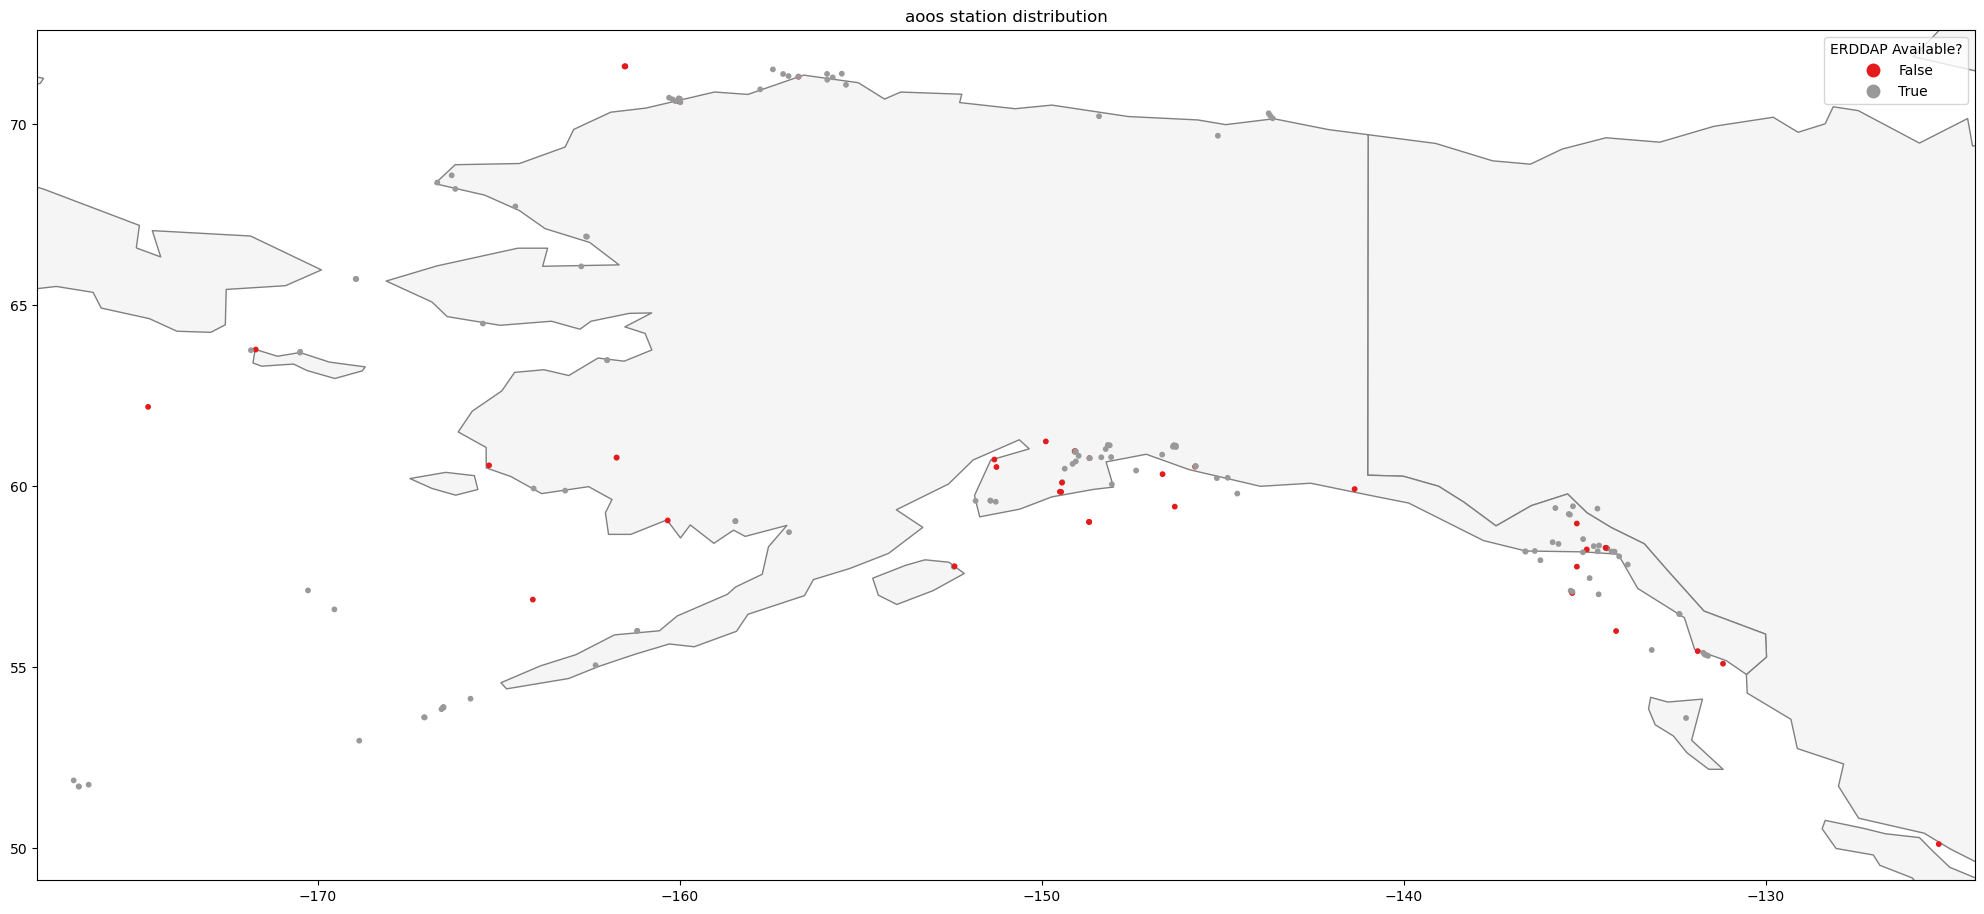

In [18]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [19]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1', style_kwds={"radius":5})


## Show me some bad coordinates

_if there are any_

In [20]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",...,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,geometry,erddap_avail


In [21]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

# Show me the stations where ERDDAP doesn't exist or provide a valid response.

Reasons:
* Station not found on RA erddap
* dataset found but no data for this CY.

In [22]:
gdf_final.loc[~gdf_final['erddap_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",...,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,geometry,erddap_avail
1,AOOS,CEO1,Not real time,CEO1 (part of the CSEM),NaN,71.5997,-161.5054,moored_buoy,2014-09-21 00:00:00,Y - but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",Data visualizaed on the AOOS Portal includes 2...,NaN,POINT (-161.50540 71.59970),False
2,AOOS,CEO2,Not real time,CEO2 (part of the CSEM),NaN,71.5998,-161.5261,moored_buoy,2015-08-20 00:00:00,Y- but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",This is the list of all sensors reporting to t...,NaN,POINT (-161.52610 71.59980),False
3,AOOS,urn:gulf-of-alaska-ecosystem-obse,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO1,"Surface real time mooring: CDOM, 150kHz ADCP, ...",59.0142,-148.6902,Fixed moored_buoy,2019-07-11 00:00:00,"Y - but not real time at moment, so data not u...",...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: 150kHz ADCP (205m), SBE 37 ...",The buoy was not serving real time data feeds ...,NaN,POINT (-148.69020 59.01420),False
4,AOOS,urn:gulf-of-alaska-ecosystem-obse-1,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO3,"Surface real time mooring: GPS, wind speed, wi...",59.0165,-148.6966,Fixed moored_buoy,2019-07-11 00:00:00,Y - but not real time at moment,...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: GPS, wind_speed, wind_from_...","Note: The 5 m SBE 37 CTD (Conductivity, temper...",NaN,POINT (-148.69660 59.01650),False
5,AOOS,urn:ioos:station:org.gulfwatchalaska:GAK1,Not real time,Oceanographic Station GAK1,Longterm non-realtime physcial parameters moor...,59.845,-149.466667,moored_buoy,1905-06-20 00:00:00,Y - but no real time,...,N,UAF_CFOS,Academic,UAF CFOS,"UAF, AOOS","NOT REAL TIME: sea_water_temperature (30 m, 60...",Subsurface mooring collecting CTD paramaters; ...,NaN,POINT (-149.46667 59.84500),False
6,AOOS,urn:ioos:station:gov.noaa.pmel:GAK_Seward,No longer reporting real time on AOOS Portal,GAKOA-Gulf of Alaska Ocean Acidification Mooring,"Resurrection Bay, Seward, Real-time OA parameters",59.85,-149.5,moored_buoy,2011-05-19 00:00:00,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, these data are Not repo...",NaN,POINT (-149.50000 59.85000),False
7,AOOS,urn:ioos:station:gov.noaa.pmel:m2,No longer reporting real time on AOOS Portal,M2 - Ocean Acidification Mooring and Ecosytem ...,"Bering Sea, Real-time OA parameters",56.87,-164.06,moored_buoy,1905-07-03 00:00:00,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA, PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, the data are Not report...",NaN,POINT (-164.06000 56.87000),False
8,AOOS,M8 - this is a federal station AOOS is partial...,Not Real Time,M8 - Ecosystem Observatory,Bering Sea - non-realtime,62.194,-174.688,moored_buoy,intermittantly deployed,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA, PMEL, UAF",NOAA,"Physical parameters, but currently also being ...",NOAA is providing sole access to these data . ...,NaN,POINT (-174.68800 62.19400),False
10,AOOS,urn:ioos:station:org.mxak:ANCHORAGE_PORT,APMA2,Anchorage Port,AIS TRANSCEIVER WITH WEATHER,61.238746,-149.888778,Fixed,2015-05-05 00:00:00,Y,...,Yf,Marine Exchange of Alaska,nonprofit,MXAK (Marine Exchange of Alaska),AOOS,"dew_point_temperaure, air_temperature, air_pre...",NaN,NaN,POINT (-149.88878 61.23875),False
12,AOOS,urn:ioos:station:org.mxak:CAPE_DECISION,CDXA2,Cape Decision,AIS STATION WI

# Do some checking against the IOOS catalog

only for datasets that we couldn't find in ERDDAP (per above)

In [23]:
from ckanapi import RemoteCKAN
import xarray as xr

problem_datasets = []

ua = 'ckanapiioos/1.0 (+https://ioos.us/)'

#ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua, get_only=True)
ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua)
ioos_catalog

gdf_ckan = gdf_final.loc[~gdf_final['erddap_avail']]

for station in gdf_ckan['Station ID'].dropna():

    RA = gdf_ckan.loc[gdf_ckan['Station ID']==station,'RA'].tolist()[0]
    
    print('Station "{}" + RA "{}"'.format(station.lower(), RA.lower()))
    
    # build RA tag query
    fq = '+organization:{}'.format(RA.lower())

    # build free text query
    q = "\""+station.lower()+"\""+" -glider"

    query = ioos_catalog.address + '/dataset/?' + 'q=' + q + '&organization=' + RA.lower()
    
    print('Query: {}'.format(query.replace(" ","%20")))

    datasets = ioos_catalog.action.package_search(q=q, fq=fq)

    

    if datasets['count'] > 0:
        print('\tfound {} dataset(s):'.format(datasets['count']))
        
        for dataset in datasets['results']:
            print('\t',dataset['title'])
            
            
            if dataset['resources']:
                print('\t',dataset['resources'][0]['url'])

                start_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-begin")['value']
                end_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-end")['value']

                print('\t','Coverage Meta:\n\t\t', start_date,' - ',end_date,'\n')

                if 'thredds' in dataset['resources'][0]['url']:
                    ds = xr.open_dataset(dataset['resources'][0]['url'])

                    time_max = ds.time.max().values

                    time_min = ds.time.min().values


                    print('\tCoverage Data:\n\t\t', time_min,' - ',time_max, '\n')

                    if pd.to_datetime(end_date) < pd.to_datetime(time_max, utc=True):
                        test_date = pd.to_datetime(time_max, utc=True)

                else:
                    test_date = pd.to_datetime(end_date, utc=True)

                if test_date > pd.to_datetime('{}-01-01'.format(cy), utc=True):
                    print('\t{} is valid.'.format(station))
                    break
                else:
                    print('\t{} is not valid.'.format(station))

                    problem_datasets.append(station)
            
            else:
                print('\t{} missing additional metadata'.format(station))
                problem_datasets.append(station)
    else:
        print("\tNo datasets found!")
        problem_datasets.append(station)

Station "ceo1" + RA "aoos"
Query: https://data.ioos.us/dataset/?q="ceo1"%20-glider&organization=aoos
	found 3 dataset(s):
	 CEO1
	 https://erddap.aoos.org/erddap/tabledap/ceo1
	 Coverage Meta:
		 2014-09-20T22:31:37Z  -  2020-10-05T23:45:01Z 

	CEO1 is not valid.
	 CEO2
	 https://erddap.aoos.org/erddap/tabledap/ceo2
	 Coverage Meta:
		 2015-08-20T18:00:32Z  -  2020-10-05T22:00:33Z 

	CEO1 is not valid.
	 CEO2
	 https://erddap.aoos.org/erddap/tabledap/ceo2
	 Coverage Meta:
		 2015-08-20T18:00:32Z  -  2020-10-05T22:00:33Z 

	CEO1 is not valid.
Station "ceo2" + RA "aoos"
Query: https://data.ioos.us/dataset/?q="ceo2"%20-glider&organization=aoos
	found 3 dataset(s):
	 CEO2
	 https://erddap.aoos.org/erddap/tabledap/ceo2
	 Coverage Meta:
		 2015-08-20T18:00:32Z  -  2020-10-05T22:00:33Z 

	CEO2 is not valid.
	 CEO2
	 https://erddap.aoos.org/erddap/tabledap/ceo2
	 Coverage Meta:
		 2015-08-20T18:00:32Z  -  2020-10-05T22:00:33Z 

	CEO2 is not valid.
	 CEO1
	 https://erddap.aoos.org/erddap/tabled

Check the datasets that didn't have coverage in ERDDAP or through IOOS catalog and see if they are **Currently Operational?**

In [24]:
gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",...,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,Unnamed: 18,geometry,erddap_avail
1,AOOS,CEO1,Not real time,CEO1 (part of the CSEM),NaN,71.5997,-161.5054,moored_buoy,2014-09-21 00:00:00,Y - but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",Data visualizaed on the AOOS Portal includes 2...,NaN,POINT (-161.50540 71.59970),False
2,AOOS,CEO2,Not real time,CEO2 (part of the CSEM),NaN,71.5998,-161.5261,moored_buoy,2015-08-20 00:00:00,Y- but never real time,...,Yp,UAF-CFOS,Academic,UAF,North Pacific Research Board,"sea_water_temperature, sea_water_electrical_co...",This is the list of all sensors reporting to t...,NaN,POINT (-161.52610 71.59980),False
3,AOOS,urn:gulf-of-alaska-ecosystem-obse,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO1,"Surface real time mooring: CDOM, 150kHz ADCP, ...",59.0142,-148.6902,Fixed moored_buoy,2019-07-11 00:00:00,"Y - but not real time at moment, so data not u...",...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: 150kHz ADCP (205m), SBE 37 ...",The buoy was not serving real time data feeds ...,NaN,POINT (-148.69020 59.01420),False
4,AOOS,urn:gulf-of-alaska-ecosystem-obse-1,not reporting real time anymore,Gulf of Alaska Ecosystem Observatory-GEO3,"Surface real time mooring: GPS, wind speed, wi...",59.0165,-148.6966,Fixed moored_buoy,2019-07-11 00:00:00,Y - but not real time at moment,...,Yp,UAF_CFOS,Academic,UAF,NSF,"Real time mooring: GPS, wind_speed, wind_from_...","Note: The 5 m SBE 37 CTD (Conductivity, temper...",NaN,POINT (-148.69660 59.01650),False
5,AOOS,urn:ioos:station:org.gulfwatchalaska:GAK1,Not real time,Oceanographic Station GAK1,Longterm non-realtime physcial parameters moor...,59.845,-149.466667,moored_buoy,1905-06-20 00:00:00,Y - but no real time,...,N,UAF_CFOS,Academic,UAF CFOS,"UAF, AOOS","NOT REAL TIME: sea_water_temperature (30 m, 60...",Subsurface mooring collecting CTD paramaters; ...,NaN,POINT (-149.46667 59.84500),False
6,AOOS,urn:ioos:station:gov.noaa.pmel:GAK_Seward,No longer reporting real time on AOOS Portal,GAKOA-Gulf of Alaska Ocean Acidification Mooring,"Resurrection Bay, Seward, Real-time OA parameters",59.85,-149.5,moored_buoy,2011-05-19 00:00:00,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, these data are Not repo...",NaN,POINT (-149.50000 59.85000),False
7,AOOS,urn:ioos:station:gov.noaa.pmel:m2,No longer reporting real time on AOOS Portal,M2 - Ocean Acidification Mooring and Ecosytem ...,"Bering Sea, Real-time OA parameters",56.87,-164.06,moored_buoy,1905-07-03 00:00:00,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA, PMEL, UAF_OARC",NOAA,"dissolved_carbon_dixoide_ppm, partial_pressure...","Though AOOS Supported, the data are Not report...",NaN,POINT (-164.06000 56.87000),False
8,AOOS,M8 - this is a federal station AOOS is partial...,Not Real Time,M8 - Ecosystem Observatory,Bering Sea - non-realtime,62.194,-174.688,moored_buoy,intermittantly deployed,Y - Federal asset AOOS Supports,...,Yp,NOAA_PMEL,gov_federal,"NOAA, PMEL, UAF",NOAA,"Physical parameters, but currently also being ...",NOAA is providing sole access to these data . ...,NaN,POINT (-174.68800 62.19400),False
10,AOOS,urn:ioos:station:org.mxak:ANCHORAGE_PORT,APMA2,Anchorage Port,AIS TRANSCEIVER WITH WEATHER,61.238746,-149.888778,Fixed,2015-05-05 00:00:00,Y,...,Yf,Marine Exchange of Alaska,nonprofit,MXAK (Marine Exchange of Alaska),AOOS,"dew_point_temperaure, air_temperature, air_pre...",NaN,NaN,POINT (-149.88878 61.23875),False
12,AOOS,urn:ioos:station:org.mxak:CAPE_DECISION,CDXA2,Cape Decision,AIS STATION WI

Print out the available metadata from the IOOS Catalog for the last dataset.

In [25]:
dataset

{'author': None,
 'author_email': None,
 'creator_user_id': '0ea3933c-4674-41dd-a17d-bfbc8c99bd75',
 'id': 'b2d98900-1bfe-4186-96f0-ec407c4fafd6',
 'isopen': False,
 'license_id': None,
 'license_title': None,
 'maintainer': None,
 'maintainer_email': None,
 'metadata_created': '2025-01-09T09:15:16.405357',
 'metadata_modified': '2025-03-04T04:20:48.117730',
 'name': 'togiak-ak',
 'notes': "Timeseries data from 'Togiak, AK' (org_mxak_togiak)",
 'num_resources': 5,
 'num_tags': 21,
 'organization': {'id': 'eb417ed8-8ef9-46e4-8cce-deec54104134',
  'name': 'aoos',
  'title': 'AOOS',
  'type': 'organization',
  'description': '',
  'image_url': 'https://s3.amazonaws.com/ioos-us/images/AOOS_logo.jpg',
  'created': '2022-05-27T16:07:12.556672',
  'is_organization': True,
  'approval_status': 'approved',
  'state': 'active'},
 'owner_org': 'eb417ed8-8ef9-46e4-8cce-deec54104134',
 'private': False,
 'state': 'active',
 'title': 'Togiak, AK',
 'type': 'dataset',
 'url': None,
 'version': None,


In [26]:
# GLOS special case as they provide ERDDAP ID

# for dataset in gdf_final.loc[(~gdf_final['erddap_avail'] & ~gdf_final['Dataset (ERDDAP) ID'].isna()),'Dataset (ERDDAP) ID'].tolist():
#     print(dataset)
#     e.dataset_id = dataset
    
#     e.constraints = {
#                  "time>=": "{}-01-01".format(cy)
#             }
        
#     e.variables = ['time']
    
#     try:
        
#         df_data = e.to_pandas(parse_dates=True)
        
#         string = '\tDate range: {} - {}'.format(df_data.min()[0],df_data.max()[0])
        
#         print(string)
        
#         if pd.to_datetime(df_data.max()[0], utc=True) > pd.to_datetime('{}-01-01'.format(cy), utc=True):
            
#             datasetid = gdf_final.loc[gdf_final['Dataset (ERDDAP) ID']==dataset,'Station ID'].tolist()[0]
            
#             problem_datasets.remove(datasetid)
        
#     except:
#         print('\tNo valid data')

In [27]:
#gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]